[0.0, 16.666666666666664, 33.33333333333332, 50.0, 46.66666666666667, 47.222222222222214, 49.999999999999986, 49.99999999999999, 51.85185185185185, 53.33333333333334, 54.54545454545455, 58.33333333333332, 61.53846153846154, 64.28571428571429, 66.66666666666667, 68.75, 70.58823529411765, 69.44444444444443, 68.42105263157893, 69.99999999999999, 69.04761904761904, 70.45454545454545, 70.65217391304347, 71.875, 72.0, 73.07692307692308, 74.07407407407408, 75.0, 74.13793103448276, 73.33333333333333, 72.58064516129032, 71.875, 71.21212121212122, 72.05882352941177, 71.42857142857143, 72.22222222222223, 72.97297297297297, 72.36842105263158, 71.7948717948718, 72.5, 73.17073170731707, 73.80952380952381, 74.4186046511628, 75.0, 75.55555555555556, 76.08695652173913, 76.59574468085107, 77.08333333333333, 77.55102040816327, 78.0, 77.25490196078431, 77.6923076923077, 77.16981132075472, 76.48148148148148, 76.9090909090909, 77.32142857142857, 76.84210526315789, 76.37931034482759, 76.77966101694915, 77.16

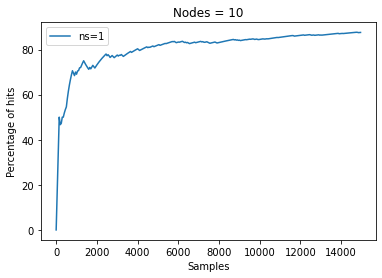

In [ ]:
from causaldag import dci, dci_stability_selection
from causaldag.datasets import create_synthetic_difference
import numpy as np
import seaborn as sns
%matplotlib inline
import itertools as itr
import matplotlib
from matplotlib import pylab, mlab, pyplot
plt = pyplot

hits=[]
perc_hits=[]
samples=[]

def percentage(percent, whole):
  return (percent/whole) * 100.0

def causalInference (n, ns):
    hits=[]
    perc_hits=[]
    samples=[]
    for i in range (2,15000,50):
        for j in range(10):
            X1, X2, true_difference = create_synthetic_difference(nnodes=n, nsamples=i, num_added=ns, num_removed=ns, num_altered=ns)
            p = X1.shape[1]
            difference_matrix = dci(X1, X2, difference_ug=list(itr.combinations(range(p), 2)))
            ddag_edges = set(zip(*np.where(difference_matrix != 0)))
            same_values = set(true_difference) & set(ddag_edges)
            diff_values = set(ddag_edges) ^ set(true_difference)
            tot_values = set(ddag_edges) | set(true_difference)
            hits.append(percentage(len(same_values), len(tot_values)))
        perc_hits.append(np.mean(hits))
        samples.append(i)
    print(perc_hits)
    print(samples)
    return perc_hits, samples

p_hits=[]
s=[]
nodes = [10, 33, 55, 77, 100]
color = ['g','r','b']

for n in nodes:
    if n==10:
        ns=1
        p_hits, s = causalInference(n,ns)
        plt.plot(s,p_hits, label = "ns=1")
        plt.title("Nodes = 10")
        plt.xlabel("Samples")
        plt.ylabel("Percentage of hits")
        plt.legend()
        plt.show()
    elif n==33:
        ns = [3,13,20]
        for num, c in zip(ns,color):
            p_hits, s = causalInference(n,num)
            plt.plot(s,p_hits, label = ("ns=" + str(num)), color = c)
            plt.title("Nodes = 33")
            plt.xlabel("Samples")
            plt.ylabel("Percentage of hits")
            plt.legend()
        plt.show()
    elif n==55:
        ns = [2,4,6]
        for num, c in zip(ns,color):
            p_hits, s = causalInference(n,num)
            plt.plot(s,p_hits, label = ("ns=" + str(num)), color = c)
            plt.title("Nodes = 55")
            plt.xlabel("Samples")
            plt.ylabel("Percentage of hits")
            plt.legend()
        plt.show()
    elif n==77:
        ns = [3,5,7]
        for num, c in zip(ns,color):
            p_hits, s = causalInference(n,num)
            plt.plot(s,p_hits, label = ("ns=" + str(num)), color = c)
            plt.title("Nodes = 77")
            plt.xlabel("Samples")
            plt.ylabel("Percentage of hits")
            plt.legend()
        plt.show()
    elif n==100:
        ns = [3,6,10]
        for num, c in zip(ns,color):
            p_hits, s = causalInference(n,num)
            plt.plot(s,p_hits, label = ("ns=" + str(num)), color = c)
            plt.title("Nodes = 100")
            plt.xlabel("Samples")
            plt.ylabel("Percentage of hits")
            plt.legend()
        plt.show()



[0.0, 33.33333333333333, 33.333333333333336, 41.66666666666666, 46.66666666666665, 49.999999999999986, 57.14285714285714, 62.5, 66.66666666666667, 65.0, 63.63636363636363, 64.58333333333333, 65.38461538461539, 67.85714285714286, 66.66666666666667, 65.625, 64.70588235294117, 63.888888888888886, 65.78947368421052, 65.0, 66.66666666666667, 68.18181818181819, 69.56521739130434, 70.83333333333333, 72.0, 70.76923076923077, 70.0, 71.07142857142857, 70.34482758620689, 71.33333333333333, 72.25806451612904, 73.125, 73.93939393939394, 73.23529411764706, 74.0, 74.72222222222223, 75.4054054054054, 74.73684210526316, 75.38461538461539, 76.0, 76.58536585365853, 75.95238095238095, 76.51162790697674, 77.04545454545455, 77.55555555555556, 76.95652173913044, 76.91489361702128, 77.39583333333333, 76.83673469387755, 77.3, 77.74509803921569, 77.21153846153847, 77.64150943396227, 78.05555555555556, 78.0, 78.39285714285714, 78.7719298245614, 79.13793103448276, 79.49152542372882, 79.0, 79.34426229508196, 79.67

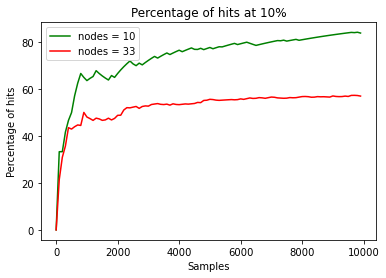

In [2]:
from causaldag import dci, dci_stability_selection
from causaldag.datasets import create_synthetic_difference
import numpy as np
import seaborn as sns
%matplotlib inline
import itertools as itr
import matplotlib
from matplotlib import pylab, mlab, pyplot
plt = pyplot

hits=[]
perc_hits=[]
samples=[]

def percentage(percent, whole):
  return (percent/whole) * 100.0

def causalInference (n, ns):
    hits=[]
    perc_hits=[]
    samples=[]
    for i in range (2,15000,100):
        for j in range(10):
            X1, X2, true_difference = create_synthetic_difference(nnodes=n, nsamples=i, num_added=ns, num_removed=ns, num_altered=ns)
            p = X1.shape[1]
            difference_matrix = dci(X1, X2, difference_ug=list(itr.combinations(range(p), 2)))
            ddag_edges = set(zip(*np.where(difference_matrix != 0)))
            same_values = set(true_difference) & set(ddag_edges)
            diff_values = set(ddag_edges) ^ set(true_difference)
            tot_values = set(ddag_edges) | set(true_difference)
            hits.append(percentage(len(same_values), len(tot_values)))
        perc_hits.append(np.mean(hits))
        samples.append(i)
    print(perc_hits)
    print(samples)
    return perc_hits, samples


p_hits=[]
s=[]
nodes = [10, 33, 55, 77, 100]


for n in nodes:
    if n==10:
        ns = 1
        p_hits, s = causalInference(n,ns)
        plt.plot(s,p_hits, label = ("nodes = 10"), color = 'g')
    elif n==33:
        ns = 1
        p_hits, s = causalInference(n,ns)
        plt.plot(s,p_hits, label = ("nodes = 33"), color = 'r')
    elif n==55:
        ns = 2
        p_hits, s = causalInference(n,ns)
        plt.plot(s,p_hits, label = ("nodes = 55"), color = 'b')
    elif n==77:
        ns = 3
        p_hits, s = causalInference(n,ns)
        plt.plot(s,p_hits, label = ("nodes = 77"), color = 'y')
    elif n==100:
        ns = 3
        p_hits, s = causalInference(n,ns)
        plt.plot(s,p_hits, label = ("nodes = 100"), color = 'm')
plt.title("Percentage of hits at 10%")
plt.xlabel("Samples")
plt.ylabel("Percentage of hits")
plt.legend()
plt.show()

10000
10
defaultdict(<function bootstrapping_dci.<locals>.<lambda> at 0x000002ABDDC74E50>, {(7, 9): 0.6600000000000004, (9, 0): 0.9900000000000007, (9, 8): 1.0000000000000007, (0, 8): 0.09, (9, 7): 0.34000000000000014, (8, 0): 0.060000000000000005, (3, 8): 0.04, (2, 7): 0.01, (0, 3): 0.01, (6, 7): 0.01, (5, 9): 0.01, (8, 3): 0.01, (4, 9): 0.01, (7, 2): 0.02, (0, 9): 0.02})


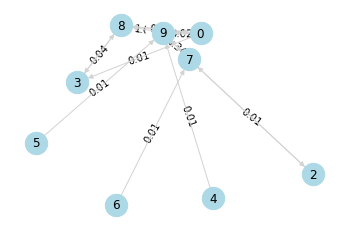

KeyboardInterrupt: 

In [5]:
from causaldag import dci, dci_stability_selection
from causaldag.datasets import create_synthetic_difference
import numpy as np
%matplotlib inline
import itertools as itr
import matplotlib
from matplotlib import pylab, mlab, pyplot
plt = pyplot
from scipy.stats import bootstrap
import random
import sklearn
from collections import defaultdict
import networkx as nx

def directed_graph(count_dict):
    G = nx.DiGraph()
    for element in count_dict:
        G.add_edges_from([(element[0],element[1])], weight=round(count_dict[element],2))
    edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    pos=nx.spring_layout(G)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    nx.draw(G,pos, node_color = 'lightblue', node_size=500,edge_color='lightgray',edge_cmap=plt.cm.Reds,with_labels=True, label = "10% graph")
    pylab.show()

def bootstrapping_dci(X1, X2, n_reps):
    count_dict = defaultdict(lambda: 0)
    for j in range(n_reps):
        # Tenemos matriz de muestras X1 y X2 (nsamples, nnodes)
        number_of_rows1 = X1.shape[0]
        number_of_rows2 = X2.shape[0]
        #coger muestra aleatoria --> Elegimos un número de fila aleatoria n_samples
        row1 = np.random.choice(number_of_rows1, X1.shape[0], replace=True)
        row2 = np.random.choice(number_of_rows2, X2.shape[0], replace=True)
        new_X1 = X1[row1, :]
        new_X2 = X2[row2, :]
        difference_matrix = dci(new_X1, new_X2, difference_ug=list(itr.combinations(range(new_X1.shape[1]), 2)))
        ddag_edges = set(zip(*np.where(difference_matrix != 0)))
        for element in ddag_edges:
         #   key = element[::-1]
          #  if key in count_dict:
           #     count_dict[key] += 1 / n_reps
            #else:
            count_dict[element] += 1 / n_reps
    return count_dict
        
        
ns = [1,2,3]
nodes = [10, 33, 55, 77, 100]
nreps = 100
nsamples = 10000

for n in nodes:
    if n==10:
        num=1
        X1, X2, true_difference = create_synthetic_difference(nnodes=n, nsamples=nsamples, num_added=num, num_removed=num, num_altered=num)
        print(X1.shape[0])
        print(X1.shape[1])
        count_dict = bootstrapping_dci(X1, X2, nreps)
        print(count_dict)
        directed_graph(count_dict)
    elif n==33:
        ns = [1,2,3]
        for num in ns:
            X1, X2, true_difference = create_synthetic_difference(nnodes=n, nsamples=nsamples, num_added=num, num_removed=num, num_altered=num)
            count_dict = bootstrapping_dci(X1, X2, nreps)
            print(count_dict)
            directed_graph(count_dict)
    elif n==55:
        ns = [2,4,6]
        for num in ns:
            X1, X2, true_difference = create_synthetic_difference(nnodes=n, nsamples=nsamples, num_added=num, num_removed=num, num_altered=num)
            count_dict = bootstrapping_dci(X1, X2, nreps)
            print(count_dict)
            directed_graph(count_dict)


In [6]:
print(true_difference)

{(9, 0), (9, 7), (9, 8)}


In [28]:

    
"""
# evaluate model
#accuracy_score no tiene en cuenta el orden, quizá sería mejor idea comprobar el porcentaje de similitud entre predicciones y original como lo hice para las gráficas
#score1 = accuracy_score(X1, X1p)
#score2 = accuracy_score(X2, X2p)
#accuracy1.append(score1)
#accuracy2.append(score2)

#for i in edge_list
# para cada edge en ddag_edges
#count_dict["(5,3)"] +=1

# si un arco sale en todas ---: muy seguros
# si un arco sale en 33% extraemos 0.33

import seaborn as sns
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set")
plt.xlabel("Accuracy")
plt.show()

# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()"""

KeyError: '(5,3)'